In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav
from scipy.signal import find_peaks
import pickle 
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy import units as u
import numpy.ma as ma
from astropy.stats import sigma_clip
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.colorbar import colorbar
from matplotlib.patches import Ellipse
import math
from matplotlib import cm
from astropy.wcs import WCS
import scipy
import scipy.ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import pkg_resources
from specutils import Spectrum1D, SpectralRegion
from astropy.modeling import models
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines
from __future__ import print_function
import pyspeckit
import pylab as pl
from reproject import reproject_interp
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [2]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
hdu1 = fits.open(get_pkg_data_filename('galactic_center/gc_2mass_k.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('galactic_center/gc_msx_e.fits'))[0]

In [262]:
def intensity_vs_coldens(globule = 'GlobB', source1 = 'HNC'):
        
    source = '12CO'
    path = globule +'_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header

    data1 = data[0,:,:,:]
    h = 6.62608e-34
    k = 1.38065e-23
    c = 299792458
    pi = math.pi
    #print(data1[0].header)

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    freq_start = header["CRVAL3"]
    freq_inc = header["CDELT3"]

    channels = np.arange(header["NAXIS3"])

    frequency = freq_start + (freq_inc * channels)
    frequency = np.array(frequency, dtype = float)
    
    freq_start_ghz = header["CRVAL3"]/1e9
    freq_inc_ghz = header["CDELT3"]/1e9
    frequency_ghz = freq_start_ghz + (freq_inc_ghz * channels)
    frequency_ghz = np.array(frequency_ghz, dtype = float)
    
    velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000

    vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000

    if globule == 'GlobB':
        x1 = round(header["CRPIX1"]-(ra_start-337.433)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.427)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2
        y2 = round(header["CRPIX2"]-(dec_start+20.814)/dec_inc)-2
        Tex = 23.94604986
        d = 0.25
        hdu1.header['CTYPE1'] = 'RA---SIN'
        hdu1.header['CRVAL1'] = 337.42934971                                                 
        hdu1.header['CDELT1'] = -5e-05                                                  
        hdu1.header['CRPIX1'] = 126.0                                                 
        hdu1.header['CUNIT1'] = 'deg'                                                            
        hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
        hdu1.header['CRVAL2'] = -20.81741516796                                                  
        hdu1.header['CDELT2'] = 5.000000000000E-05                                                  
        hdu1.header['CRPIX2'] = 1.260000000000E+02                                                  
        hdu1.header['CUNIT2'] = 'deg'
        hdu1.header['NAXIS1'] = 250                                                  
        hdu1.header['NAXIS2'] = 250
        hdu1.header['BITPIX'] = -32
        hdu1.header['LONPOLE'] = 1.800000000000E+02 
        hdu1.header['BUNIT'] = 'Jy/beam'
        hdu1.header['TELESCOP'] = 'ALMA'
        hdu1.header['INSTRUME'] = 'ALMA'
        hdu1.header['ORIGIN'] = 'CASA 5.4.0-70'
    elif globule == 'GlobC':
        x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1 
        y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1
        Tex = 28.92998995290211
        d = 0.07
        hdu1.header['CTYPE1'] = 'RA---SIN'
        hdu1.header['CRVAL1'] = 337.4074166667
        hdu1.header['CDELT1'] = -2.5e-05
        hdu1.header['CRPIX1'] = 316.0
        hdu1.header['CUNIT1'] = 'deg'
        hdu1.header['CTYPE2'] = 'DEC--SIN'
        hdu1.header['CRVAL2'] = -20.8
        hdu1.header['CDELT2'] = 2.5e-05
        hdu1.header['CRPIX2'] = 316.0 
        hdu1.header['CUNIT2'] = 'deg'
        hdu1.header['NAXIS1'] = 630
        hdu1.header['NAXIS2'] = 630
        hdu1.header['BITPIX'] = -32
        hdu1.header['LONPOLE'] = 1.800000000000E+02 
        hdu1.header['BUNIT'] = 'Jy/beam'
        hdu1.header['TELESCOP'] = 'ALMA'
        hdu1.header['INSTRUME'] = 'ALMA'
        hdu1.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 

    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]

    integrated = np.sum(data3[:, :, :], axis = 0)
    max_val = np.nanmax(integrated)

    B0 = 5.76e10
    A_lu = 7.16e-7
    r = 5
    b = 5

    extent = [ra[x1], ra[x2], dec[y1], dec[y2]]

    a = [x for x in range(len(data1[:, 0, 0]))]
    array = []
    for i in range(len(a)):
        if np.nanmax(data3[a[i], :, :]) > d*max_val:
            array.append(a[i])
    
    hnu_k = h*frequency[0]/k

    integrated = np.sum(data3[:, :, :], axis = 0)

    max_val = np.nanmax(integrated)

    moment0 = np.sum(data3[array, :, :], axis = 0)*abs(vel_inc)

    sigma_mask = sigma_clip(moment0, sigma=3, maxiters=None, cenfunc='mean')
    newmask = (moment0 < np.amax(sigma_mask))
    mom0 = np.ma.array(moment0, mask = newmask)
    
    figure = plt.figure(figsize=[10,20/3])
    
    ax = figure.add_subplot(1, 1, 1)
    bmaj = header['BMAJ']#major beam width
    bmin = header['BMIN'] #minor beam width
    bpa = header['BPA']
    beam = Ellipse(xy=(ra[x1 + 10], dec[y1 + 10]), width=bmaj, height=bmin, angle=bpa, color = 'green', zorder = 1)
    ax.add_artist(beam)

    I = np.nanmax(mom0)    
    t_mb = 1.222e3*mom0*1000/(bmin*bmaj*3600*3600*frequency_ghz[0]**2)
    X = 1/(np.exp(hnu_k/2.73)-1)
    den = (1/(1/(np.exp(hnu_k/Tex)-1)-X))*t_mb/hnu_k
    almost = 1-den
    opt_depth_map = -np.log(almost)

    Z = (k*Tex)/(h*B0)+(1/3)

    mu_lu = np.sqrt((A_lu*3*h*(c**3))/(64*(pi**4)*(frequency[0]**3)))
    term1 = 3*h/(8*pi**3*mu_lu**2)
    Y = np.exp(hnu_k/Tex)-1
    N_u = Y*term1*opt_depth_map
    col_dens = N_u*Z/r*np.exp(h*B0*b/(k*Tex))

    path1 = globule + '_'+ source1 + '.image.pbcor.fits'
    cube1 = fits.open(path1)
    data_0 = cube1[0].data
    header1 = cube1[0].header

    data_1 = data_0[0,:,:,:]
    

    ra1_start = header1["CRVAL1"]
    ra1_inc = header1["CDELT1"]

    channels0 = np.arange(header1["NAXIS1"]) - header1["CRPIX1"]+1

    ra1 = ra1_start + (ra1_inc * channels0)
    ra1 = np.array(ra1, dtype = float)

    dec1_start = header1["CRVAL2"]
    dec1_inc = header1["CDELT2"]

    channels01 = np.arange(header1["NAXIS2"]) - header1["CRPIX2"]+1

    dec1 = dec1_start + (dec1_inc * channels01)
    dec1 = np.array(dec1, dtype = float)

    if globule == 'GlobB':
        x1_1 = round(header1["CRPIX1"]-(ra1_start-337.433)/ra1_inc)-1
        x2_1 = round(header1["CRPIX1"]-(ra1_start-337.427)/ra1_inc)-1
        y1_1 = round(header1["CRPIX2"]-(dec1_start+20.818)/dec1_inc)-1
        y2_1 = round(header1["CRPIX2"]-(dec1_start+20.814)/dec1_inc)-1
    elif globule == 'GlobC':
        x1_1 = round(header1["CRPIX1"]-(ra1_start-337.409)/ra1_inc)-1
        x2_1 = round(header1["CRPIX1"]-(ra1_start-337.406)/ra1_inc)-1 
        y1_1 = round(header1["CRPIX2"]-(dec1_start+20.801)/dec1_inc)-1
        y2_1 = round(header1["CRPIX2"]-(dec1_start+20.796)/dec1_inc)-1

    data_1 = data_0[0,:,:,:]
    data_2 = data_1[:, :, np.arange(x1_1, x2_1)]
    data_3 = data_2[:, np.arange(y1_1, y2_1), :]

    integrated1 = np.sum(data_3[:, :, :], axis = 0)
    max_val1 = np.nanmax(integrated1)

    if source1 == '12CO':
        if globule == 'GlobB':
            d1 = 0.25
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.42934971                                                 
            hdu2.header['CDELT1'] = -5e-05                                                  
            hdu2.header['CRPIX1'] = 126.0                                                 
            hdu2.header['CUNIT1'] = 'deg'                                                            
            hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu2.header['CRVAL2'] = -20.81741516796                                                  
            hdu2.header['CDELT2'] = 5.000000000000E-05                                                  
            hdu2.header['CRPIX2'] = 1.260000000000E+02                                                  
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 250                                                  
            hdu2.header['NAXIS2'] = 250
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d1 = 0.07
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.4074166667
            hdu2.header['CDELT1'] = -2.5e-05
            hdu2.header['CRPIX1'] = 316.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.8
            hdu2.header['CDELT2'] = 2.5e-05
            hdu2.header['CRPIX2'] = 316.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 630
            hdu2.header['NAXIS2'] = 630
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 
    elif source1 == '13CO':
        if globule == 'GlobB':
            d1 = 0.25
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 3.374293497100E+02                                                  
            hdu2.header['CDELT1'] = -5.000000000000E-05                                                  
            hdu2.header['CRPIX1'] = 1.260000000000E+02                                                  
            hdu2.header['CUNIT1'] = 'deg'                                                            
            hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu2.header['CRVAL2'] = -2.081741516796E+01                                                  
            hdu2.header['CDELT2'] = 5.000000000000E-05                                                  
            hdu2.header['CRPIX2'] = 1.260000000000E+02                                                  
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 250                                                  
            hdu2.header['NAXIS2'] = 250
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d1 = 0.1
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.4074166667
            hdu2.header['CDELT1'] = -2.5e-05
            hdu2.header['CRPIX1'] = 316.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.8
            hdu2.header['CDELT2'] = 2.5e-05
            hdu2.header['CRPIX2'] = 316.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 630
            hdu2.header['NAXIS2'] = 630
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 
    elif source1 == 'C18O':
        if globule == 'GlobB':
            d1 = 0.29
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.42934971                                               
            hdu2.header['CDELT1'] = -5e-05                                                  
            hdu2.header['CRPIX1'] = 126.0                                                 
            hdu2.header['CUNIT1'] = 'deg'                                                            
            hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu2.header['CRVAL2'] = -20.81741516796                                                  
            hdu2.header['CDELT2'] = 5.000000000000E-05                                                  
            hdu2.header['CRPIX2'] = 1.260000000000E+02                                                  
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 250                                                  
            hdu2.header['NAXIS2'] = 250
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d1 = 0.15
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.4074166667
            hdu2.header['CDELT1'] = -2.5e-05
            hdu2.header['CRPIX1'] = 316.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.8
            hdu2.header['CDELT2'] = 2.5e-05
            hdu2.header['CRPIX2'] = 316.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 630
            hdu2.header['NAXIS2'] = 630
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 
    elif source1 == 'CCH':
        if globule == 'GlobB':
            d1 = 0.25
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.4293456831                                                 
            hdu2.header['CDELT1'] = -4.722222222222e-05                                                  
            hdu2.header['CRPIX1'] = 301.0                                                 
            hdu2.header['CUNIT1'] = 'deg'                                                            
            hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu2.header['CRVAL2'] = -20.81741557774                                                 
            hdu2.header['CDELT2'] = 4.722222222222e-05                                                 
            hdu2.header['CRPIX2'] = 301.0                                                  
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600                                                  
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'
        else:
            d1 = 0.15
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 301.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071455
            hdu2.header['CDELT2'] = 4.722222222222e-05
            hdu2.header['CRPIX2'] = 301.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source1 == 'CCH_32':
        if globule == 'GlobB':
            d1 = 0.15
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.4293501741                                                  
            hdu2.header['CDELT1'] = -3.611111111111e-05                                                 
            hdu2.header['CRPIX1'] = 151.0
            hdu2.header['CUNIT1'] = 'deg'                                                            
            hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu2.header['CRVAL2'] = -20.81741515042                                                  
            hdu2.header['CDELT2'] = 3.611111111111e-05                                                  
            hdu2.header['CRPIX2'] = 151.0                                                  
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 300                                                 
            hdu2.header['NAXIS2'] = 300
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d1 = 0.08
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -3.333333333333e-05
            hdu2.header['CRPIX1'] = 151.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071196
            hdu2.header['CDELT2'] = 3.333333333333e-05
            hdu2.header['CRPIX2'] = 151.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 300
            hdu2.header['NAXIS2'] = 300
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'
    elif source1 == 'HC3N':
        if globule == 'GlobB':
            d1 = 0.3
            hdu2.header['CTYPE1'] = 'RA---SIN'
            hdu2.header['CRVAL1'] = 337.4293456831                                                  
            hdu2.header['CDELT1'] = -4.722222222222e-05                                                 
            hdu2.header['CRPIX1'] = 301.0                                                  
            hdu2.header['CUNIT1'] = 'deg'                                                            
            hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu2.header['CRVAL2'] = -20.81741557774                                                  
            hdu2.header['CDELT2'] = 4.722222222222e-05                                                  
            hdu2.header['CRPIX2'] = 301.0                                                  
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600                                                  
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'
        else:
            d1 = 0.25
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 301.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071455
            hdu2.header['CDELT2'] = 4.722222222222e-05
            hdu2.header['CRPIX2'] = 301.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source1 == 'HCN':
        if globule == 'GlobB':
            d1 = 0.06
            hdu2.header['CTYPE1'] = 'RA---SIN'  
            hdu2.header['CRVAL1'] = 337.4293456831 
            hdu2.header['CDELT1'] = -4.722222222222E-05
            hdu2.header['CRPIX1'] = 3.010000000000E+02
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -2.081741557774E+01 
            hdu2.header['CDELT2'] = 4.722222222222E-05
            hdu2.header['CRPIX2'] = 3.010000000000E+02 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d1 = 0.08
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 301.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071455
            hdu2.header['CDELT2'] = 4.722222222222e-05
            hdu2.header['CRPIX2'] = 301.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source1 == 'HCN_32':
        if globule == 'GlobB':
            d1 = 0.065
            hdu2.header['CTYPE1'] = 'RA---SIN'        
            hdu2.header['CRVAL1'] = 337.4293501741
            hdu2.header['CDELT1'] = -3.611111111111e-05
            hdu2.header['CRPIX1'] = 151.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.81741515042 
            hdu2.header['CDELT2'] = 3.611111111111e-05
            hdu2.header['CRPIX2'] = 151.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 300
            hdu2.header['NAXIS2'] = 300
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d1 = 0.04
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -3.333333333333e-05
            hdu2.header['CRPIX1'] = 151.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071196
            hdu2.header['CDELT2'] = 3.333333333333e-05
            hdu2.header['CRPIX2'] = 151.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 300
            hdu2.header['NAXIS2'] = 300
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'
    elif source1 == 'HCOp':
        if globule == 'GlobB':
            d1 = 0.08
            hdu2.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu2.header['CRVAL1'] = 337.4293456831
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 3.010000000000E+02
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.81741557774 
            hdu2.header['CDELT2'] = 4.722222222222E-05
            hdu2.header['CRPIX2'] = 3.010000000000E+02 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d1 = 0.1
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 301.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071455
            hdu2.header['CDELT2'] = 4.722222222222e-05
            hdu2.header['CRPIX2'] = 301.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source1 == 'HCOp_32':
        if globule == 'GlobB':
            d1 = 0.1
            hdu2.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu2.header['CRVAL1'] = 337.4293502177
            hdu2.header['CDELT1'] = -3.888888888889e-05
            hdu2.header['CRPIX1'] = 101.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.81741514942 
            hdu2.header['CDELT2'] = 3.888888888889e-05
            hdu2.header['CRPIX2'] = 101.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 200
            hdu2.header['NAXIS2'] = 200
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'
        else:
            d1 = 0.08
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.4076835305
            hdu2.header['CDELT1'] = -3.333333333333e-05
            hdu2.header['CRPIX1'] = 151.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947070536
            hdu2.header['CDELT2'] = 3.333333333333e-05
            hdu2.header['CRPIX2'] = 151.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 300
            hdu2.header['NAXIS2'] = 300
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'
    elif source1 == 'HNC':
        if globule == 'GlobB':
            d1 = 0.3
            hdu2.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu2.header['CRVAL1'] = 337.4293456831
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 3.010000000000E+02
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.81741557774 
            hdu2.header['CDELT2'] = 4.722222222222E-05
            hdu2.header['CRPIX2'] = 3.010000000000E+02 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d1 = 0.08
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.407684391
            hdu2.header['CDELT1'] = -4.722222222222e-05
            hdu2.header['CRPIX1'] = 301.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947071455
            hdu2.header['CDELT2'] = 4.722222222222e-05
            hdu2.header['CRPIX2'] = 301.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 600
            hdu2.header['NAXIS2'] = 600
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source1 == 'HNC_32':
        if globule == 'GlobB':
            d1 = 0.2
            hdu2.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu2.header['CRVAL1'] = 337.4293502177
            hdu2.header['CDELT1'] = -3.888888888889e-05
            hdu2.header['CRPIX1'] = 101.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.81741514942 
            hdu2.header['CDELT2'] = 3.888888888889e-05
            hdu2.header['CRPIX2'] = 101.0
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 200
            hdu2.header['NAXIS2'] = 200
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d1 = 0.12
            hdu2.header['CTYPE1'] = 'RA---SIN' 
            hdu2.header['CRVAL1'] = 337.4076835305
            hdu2.header['CDELT1'] = -3.333333333333e-05
            hdu2.header['CRPIX1'] = 151.0
            hdu2.header['CUNIT1'] = 'deg'
            hdu2.header['CTYPE2'] = 'DEC--SIN'
            hdu2.header['CRVAL2'] = -20.79947070536
            hdu2.header['CDELT2'] = 3.333333333333e-05
            hdu2.header['CRPIX2'] = 151.0 
            hdu2.header['CUNIT2'] = 'deg'
            hdu2.header['NAXIS1'] = 300
            hdu2.header['NAXIS2'] = 300
            hdu2.header['BITPIX'] = -32
            hdu2.header['LONPOLE'] = 1.800000000000E+02 
            hdu2.header['BUNIT'] = 'Jy/beam'
            hdu2.header['TELESCOP'] = 'ALMA'
            hdu2.header['INSTRUME'] = 'ALMA'
            hdu2.header['ORIGIN'] = 'CASA 5.1.2-4'

    a1 = [x for x in range(len(data_1[:, 0, 0]))]
    array1 = []
    for i in range(len(a1)):
        if np.nanmax(data_3[a1[i], :, :]) > d1*max_val1:
            array1.append(a1[i])

    print(array1)

    integrated1 = np.sum(data_1[array1, :, :], axis = 0)
    from reproject import reproject_interp, reproject_adaptive
    new_array, footprint = reproject_adaptive((integrated1, hdu2.header), hdu1.header)
    #print(integrated1)
    sigma_mask1 = sigma_clip(new_array, sigma=3, maxiters=None, cenfunc='mean')
    newmask1 = (new_array < np.amax(sigma_mask1))

    integrated1_mask = np.ma.array(new_array, mask = newmask1)

    data_2 = integrated1_mask[:, np.arange(x1, x2)]
    data_3 = data_2[np.arange(y1, y2), :]
    print(integrated1_mask.shape)
    extent = [ra[x1], ra[x2], dec[y1], dec[y2]]
    
    y = col_dens
    x = data_3

    plt.plot(x, y)
    #print(col_dens[50, 60])
    #m, b = np.polyfit(np.mean((x), axis = 0), np.mean((y), axis = 0), 1)
    #plt.plot(x, m*x + b, color = 'red')
    #print(m, b)
    plt.title(source1 + ' Integrated Intensity to ' + source + ' Column Density' + globule, fontsize = 20)
    plt.xlabel('Integrated Intensity',fontsize=14)
    plt.ylabel('Column Density',fontsize=14)
    plt.xticks()
    plt.yticks()

[11, 12, 13, 26, 27, 28, 29, 36, 37, 38, 39]
(250, 250)


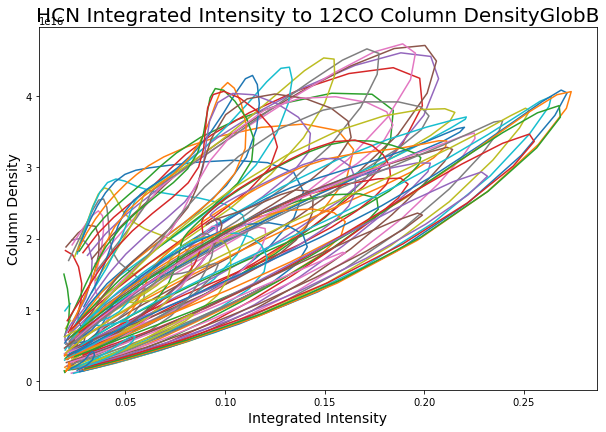

In [263]:
intensity_vs_coldens(globule = 'GlobB', source1 = 'HCN')